In [6]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (0.22.1)


In [2]:
import warnings
warnings.filterwarnings('ignore')
import sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import time
import math
from datetime import datetime
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10,6



In [35]:
print(sklearn.__version__)

0.22.1


In [36]:
print("NumPy", np.__version__)
print("Pandas", pd.__version__)

NumPy 1.16.2
Pandas 0.23.4


In [3]:
nce = pd.read_excel('./SABRE NCe Data.xlsx', sheet_name='SABRE 2018-2019 Data')
#Parse string to datetime type
nce['Date Opened'] = nce['Date Opened'].dt.strftime('%Y-%m')
nce['Date Opened'] = pd.to_datetime(nce['Date Opened'], infer_datetime_format = True, format='%Y%m')
analysis = nce[['Date Opened','NCe']]
print(analysis.head(5))

df = analysis.groupby('Date Opened', as_index=False).count()
df = analysis.groupby('Date Opened', as_index=False).count()
print(df.head(5))

df = df[12:24]
indexedNce = df.set_index(['Date Opened'])
print(indexedNce)

  Date Opened     NCe
0  2018-01-01  295356
1  2018-01-01  295357
2  2018-01-01  295358
3  2018-01-01  295375
4  2018-01-01  295389
  Date Opened  NCe
0  2018-01-01  163
1  2018-02-01  120
2  2018-03-01  129
3  2018-04-01  109
4  2018-05-01   98
             NCe
Date Opened     
2019-01-01    85
2019-02-01    72
2019-03-01    51
2019-04-01    96
2019-05-01    84
2019-06-01    81
2019-07-01    71
2019-08-01    58
2019-09-01    82
2019-10-01    84
2019-11-01    72
2019-12-01    75


In [38]:
nce.head()

,NCe,Current State,Business Unit,Customer Involvement Impact,Customer Name,Customer Temperature Impact,Safety Impact,Wafer Scrap Impact,Customer Tracking Number,Date Opened,...,Start Up Date,Warranty End,IBASE SO Line,MyLam System,Opportunity Type Desc,IBASE Catalog Profile,Investigation,Investigation Created,RCCA,RCCA Created
0,295356,Closed - No Investigation Required,NaN,NaN,TAIWAN SEMICONDUCTOR MFG. CO.,Unknown,No,No,NaN,2018-01-01 14:35:00,...,2017-12-20,2018-12-19,20,SABRE MAX,PG System Opportunity,DELCTFILL,NaN,No Investigation Created,NaN,No RCCA Created
1,295357,Closed - No Investigation Required,DEP,NaN,TAIWAN SEMICONDUCTOR MFG. CO.,Unknown,No,No,NaN,2018-01-01 14:39:00,...,2017-12-20,2018-12-19,20,SABRE MAX,PG System Opportunity,DELCTFILL,NaN,No Investigation Created,NaN,No RCCA Created
2,295358,Closed - No Investigation Required,DEP,NaN,TAIWAN SEMICONDUCTOR MFG. CO.,Unknown,No,No,NaN,2018-01-01 14:41:00,...,2017-12-20,2018-12-19,20,SABRE MAX,PG System Opportunity,DELCTFILL,NaN,No Investigation Created,NaN,No RCCA Created
3,295375,Closed - No Investigation Required,NaN,NaN,Advance Semiconductor Engineering I,Hot,No,No,NaN,2018-01-02 01:30:00,...,2016-12-23,2018-02-22,20,SABRE 3D,PG System Opportunity,DELCTFL3D,NaN,No Investigation Created,NaN,No RCCA Created
4,295389,Closed - No Investigation Required,DEP,NaN,SMIC Advanced Technology Research &,Warm,No,No,NaN,2018-01-02 06:10:00,...,2017-11-29,2019-01-28,20,SABRE EXCEL,PG System Opportunity,DELCTFILL,NaN,No Investigation Created,NaN,No RCCA Created


In [16]:
data.shape

(2137, 64)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 0 to 2136
Data columns (total 64 columns):
NCe                              2137 non-null int64
Current State                    2137 non-null object
Business Unit                    1113 non-null object
Customer Involvement Impact      0 non-null float64
Customer Name                    2137 non-null object
Customer Temperature Impact      2136 non-null object
Safety Impact                    2135 non-null object
Wafer Scrap Impact               2135 non-null object
Customer Tracking Number         9 non-null object
Date Opened                      2137 non-null datetime64[ns]
Description                      2058 non-null object
Fab Name                         2137 non-null object
Factory Responsible              39 non-null object
FCID                             2037 non-null object
Impact                           2137 non-null object
Notification Line Item           2137 non-null int64
Notification Number           

In [18]:
data.describe()

,NCe,Customer Involvement Impact,Notification Line Item,Notification Number,Part Order Issue Date,Part Quantity,Management Region,Equipment,IBASE SO Line,Investigation,RCCA
count,2137.000000,0.0,2137.000000,2.137000e+03,0.0,2137.000000,1.0,2.137000e+03,2137.000000,414.000000,76.000000
mean,444311.564343,NaN,8.857277,3.007501e+08,NaN,1.930744,10.0,9.451660e+06,23.339729,446774.185990,489000.618421
std,94890.128838,NaN,13.370258,5.781739e+04,NaN,4.755233,NaN,2.413735e+06,27.803192,81961.559713,84751.561623
min,295356.000000,NaN,1.000000,3.004860e+08,NaN,1.000000,10.0,1.221200e+04,0.000000,298761.000000,322682.000000
25%,361418.000000,NaN,1.000000,3.006984e+08,NaN,1.000000,10.0,1.006728e+07,20.000000,383918.250000,424086.750000
50%,440337.000000,NaN,4.000000,3.007490e+08,NaN,1.000000,10.0,1.007223e+07,20.000000,444633.000000,518434.000000
75%,531305.000000,NaN,12.000000,3.007993e+08,NaN,1.000000,10.0,1.008104e+07,20.000000,512519.250000,562737.500000
max,610696.000000,NaN,120.000000,3.008589e+08,NaN,96.000000,10.0,1.009206e+07,470.000000,597983.000000,604986.000000


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(3.674999999999997, 0.5, 'Notification Line Item')

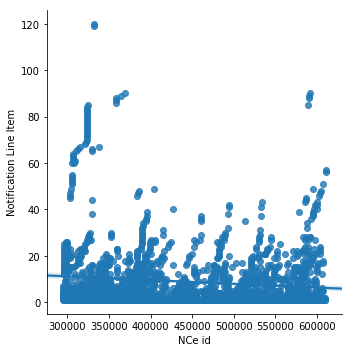

In [20]:
sns.lmplot('NCe' , 'Notification Line Item', data)

plt.xlabel("NCe id")
plt.ylabel("Notification Line Item")

Text(-15.075000000000003, 0.5, 'Investigation')

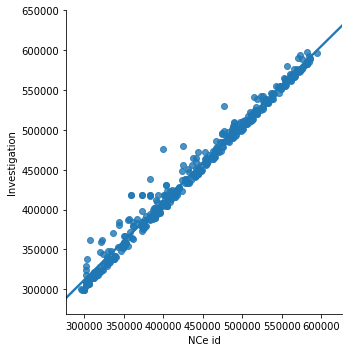

In [21]:
sns.lmplot('NCe' , 'Investigation', data)

plt.xlabel("NCe id")
plt.ylabel("Investigation")

Text(-15.075000000000003, 0.5, 'RCCA')

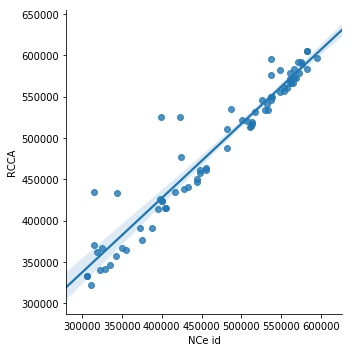

In [22]:
sns.lmplot('NCe' , 'RCCA', data)

plt.xlabel("NCe id")
plt.ylabel("RCCA")

Text(3.799999999999997, 0.5, 'Part Quantity')

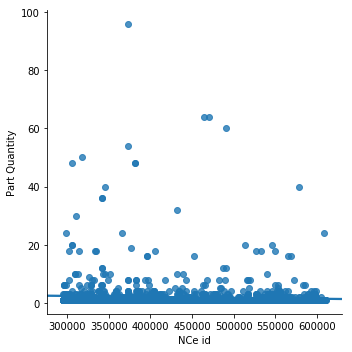

In [23]:
sns.lmplot('NCe' , 'Part Quantity', data)

plt.xlabel("NCe id")
plt.ylabel("Part Quantity")

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
X = data.drop('NCe', axis=1)
Y= data['NCe']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [27]:
x_train.shape, y_train.shape

((1709, 63), (1709,))

In [28]:
x_test.shape, y_test.shape

((428, 63), (428,))

In [30]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

ValueError: could not convert string to float: 'Closed - No Investigation Required'